In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import knr

In [2]:
SEED = 0
np.random.seed(SEED)

In [3]:
knr_model = knr.build_KNR(n_neighbors=3)

In [4]:
knr_model.predict([i * 5000 for i in range(10)])

array([ 0.  , 15.56,  4.44, 15.56, 15.56, 13.33,  8.89, 11.11,  2.22,
       20.  ])

In [5]:
df1 = pd.read_csv('kaggle/input/train1.csv')

In [6]:
y_pred = knr_model.predict(df1['Time (s)'].values)

In [7]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
df1['CO_diff'] = df1['CO (ppm)'] - y_pred

(-2.0, 2.0)

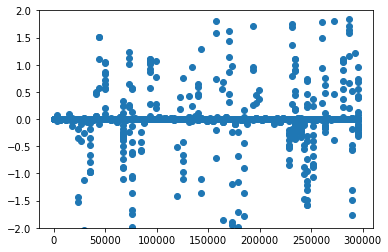

In [16]:
plt.plot(df1['CO_diff'], 'o')
plt.ylim(-2, 2)

In [17]:
df2 = pd.read_csv('kaggle/input/train2.csv')

In [18]:
y_pred2 = knr_model.predict(df2['Time (s)'].values)

In [19]:
df2['CO_diff'] = df2['CO (ppm)'] - y_pred2

(-2.0, 2.0)

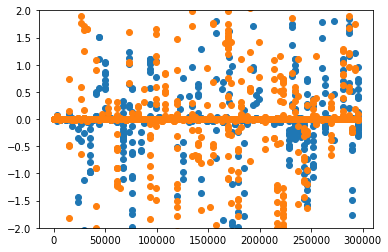

In [20]:
plt.plot(df1['CO_diff'], 'o')
plt.plot(df2['CO_diff'], 'o')
plt.ylim(-2, 2)

In [21]:
df3 = pd.read_csv('kaggle/input/train3.csv')
y_pred3 = knr_model.predict(df3['Time (s)'].values)
df3['CO_diff'] = df3['CO (ppm)'] - y_pred3

(-3.0, 3.0)

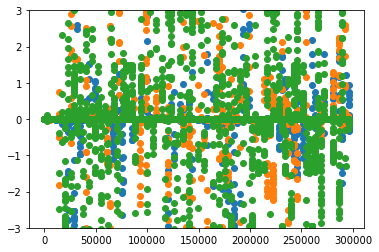

In [22]:
plt.plot(df1['CO_diff'], 'o')
plt.plot(df2['CO_diff'], 'o')
plt.plot(df3['CO_diff'], 'o')
plt.ylim(-3, 3)

(40000.0, 42000.0)

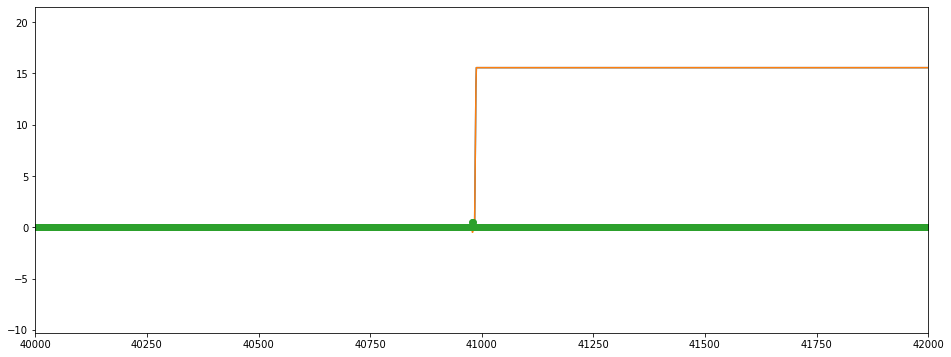

In [23]:
plt.figure(figsize=(16, 6))
plt.plot(df1['CO (ppm)'])
plt.plot(y_pred)
plt.plot(df1['CO_diff'], 'o')
plt.xlim(40000, 42000)

In [3]:
# 적절한 N을 찾아보자.
file_paths = glob.glob('kaggle/input/train*.csv')
result = {}
result_graph = {}
for N in range(1, 13):
    print(N)
    result[N] = []
    
    for valid_file in file_paths:
        train_files = [file_path for file_path in file_paths if file_path != valid_file]
        model = knr.build_KNR(file_paths=train_files, n_neighbors=N)
        df = pd.read_csv(valid_file)
        x = df['Time (s)'].values
        y_true = df['CO (ppm)'].values
        y_pred = model.predict(x)
        me = np.abs(y_pred - y_true).mean()
        result[N].append(me)
        result_graph[(N, valid_file)] = y_pred
        print(valid_file, me)
        
    print(N, ':', np.mean(result[N]))
    

1
kaggle/input\train1.csv 0.004642949218683953
kaggle/input\train10.csv 0.0048873510025694775
kaggle/input\train11.csv 0.01828177990320585
kaggle/input\train12.csv 0.005065968750950551
kaggle/input\train2.csv 0.007597533128493888
kaggle/input\train3.csv 0.05181575684815691
kaggle/input\train4.csv 0.0032879872688591017
kaggle/input\train5.csv 0.004724148152158465
kaggle/input\train6.csv 0.011450242471209718
kaggle/input\train7.csv 0.006904884680419344
kaggle/input\train8.csv 0.004899834869587581
kaggle/input\train9.csv 0.008508824096271475
1 : 0.011005605032547194
2
kaggle/input\train1.csv 0.013351995108202808
kaggle/input\train10.csv 0.012044714409198905
kaggle/input\train11.csv 0.025622990998825174
kaggle/input\train12.csv 0.02059503632058579
kaggle/input\train2.csv 0.02538042576402364
kaggle/input\train3.csv 0.0530000654406807
kaggle/input\train4.csv 0.019969051317755813
kaggle/input\train5.csv 0.012686706200822453
kaggle/input\train6.csv 0.03021767085827975
kaggle/input\train7.csv 0

In [58]:
# 적절한 N을 찾아보자.
file_paths = glob.glob('kaggle/input/train*.csv')
# result = {}
# result_graph = {}
for N in [24]:
    print(N)
    result[N] = []
    
    for valid_file in file_paths:
        train_files = [file_path for file_path in file_paths if file_path != valid_file]
        model = knr.build_KNR(file_paths=train_files, n_neighbors=N)
        df = pd.read_csv(valid_file)
        x = df['Time (s)'].values
        y_true = df['CO (ppm)'].values
        y_pred = model.predict(x)
        me = np.abs(y_pred - y_true).mean()
        result[N].append(me)
        result_graph[(N, valid_file)] = y_pred
        print(valid_file, me)
        
    print(N, ':', np.mean(result[N]))
    

24
kaggle/input\train1.csv 0.006502652849156885
kaggle/input\train10.csv 0.006474486697868887
kaggle/input\train11.csv 0.01701624406308999
kaggle/input\train12.csv 0.006421410732919327
kaggle/input\train2.csv 0.006610716921493406
kaggle/input\train3.csv 0.05140058815730648
kaggle/input\train4.csv 0.006362882836357887
kaggle/input\train5.csv 0.0065448351637355994
kaggle/input\train6.csv 0.00681575898773486
kaggle/input\train7.csv 0.006527626824361368
kaggle/input\train8.csv 0.006754984226072738
kaggle/input\train9.csv 0.006683835244324689
24 : 0.01117633522536851


In [4]:
result

{1: [0.004642949218683953,
  0.0048873510025694775,
  0.01828177990320585,
  0.005065968750950551,
  0.007597533128493888,
  0.05181575684815691,
  0.0032879872688591017,
  0.004724148152158465,
  0.011450242471209718,
  0.006904884680419344,
  0.004899834869587581,
  0.008508824096271475],
 2: [0.013351995108202808,
  0.012044714409198905,
  0.025622990998825174,
  0.02059503632058579,
  0.02538042576402364,
  0.0530000654406807,
  0.019969051317755813,
  0.012686706200822453,
  0.03021767085827975,
  0.016033162029352885,
  0.01816355369449011,
  0.03602664972550618],
 3: [0.008355308877822936,
  0.006806750808126568,
  0.018689900622068736,
  0.008078711466400865,
  0.00888143866684473,
  0.05208574062170197,
  0.007857550982297283,
  0.010043296134186324,
  0.015417794650317078,
  0.010291878521708398,
  0.009006392686441718,
  0.011439431125503769],
 4: [0.006086462448214909,
  0.006039722980277734,
  0.017388210629340324,
  0.00599133599510188,
  0.00729469406299944,
  0.05164162

In [5]:
result_graph

{(1, 'kaggle/input\\train1.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1, 'kaggle/input\\train10.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1, 'kaggle/input\\train11.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1, 'kaggle/input\\train12.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1, 'kaggle/input\\train2.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1,
  'kaggle/input\\train3.csv'): array([0.  , 0.  , 0.  , ..., 2.22, 2.22, 2.22]),
 (1, 'kaggle/input\\train4.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1, 'kaggle/input\\train5.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1, 'kaggle/input\\train6.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1, 'kaggle/input\\train7.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1, 'kaggle/input\\train8.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1, 'kaggle/input\\train9.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (2, 'kaggle/input\\train1.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (2, 'kaggle/input\\train10.csv'): array([0., 0

In [60]:
df = pd.read_csv('kaggle/input/train1.csv')

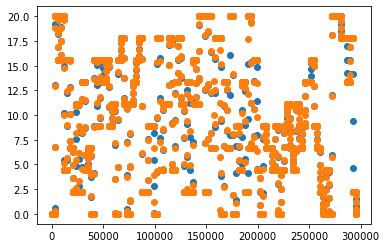

In [13]:
plt.plot(df['CO (ppm)'], 'o')
plt.plot(result_graph[(1, 'kaggle/input\\train1.csv')], 'o')

(0.0, 1.2)

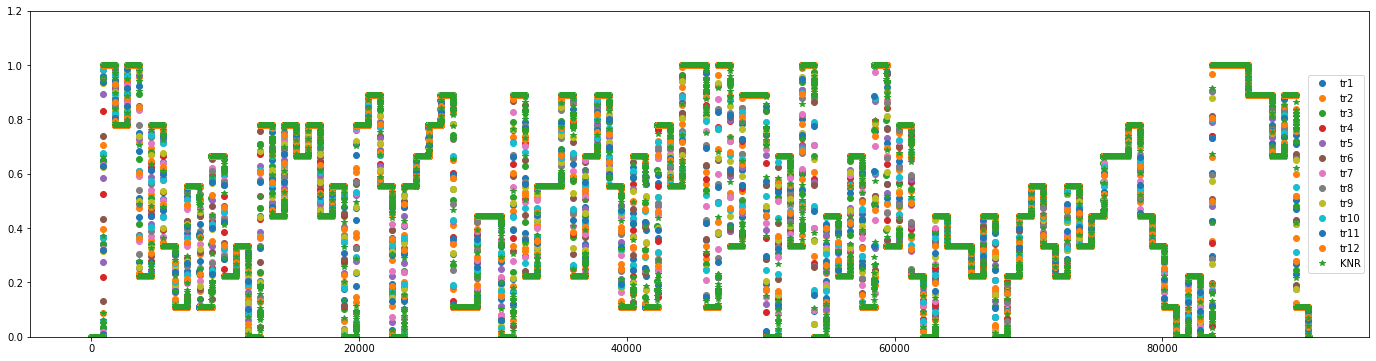

In [64]:
plt.figure(figsize=(24,6))
for i in range(1, 13):
    df_tmp = pd.read_csv('kaggle/input/train{}.csv'.format(i))
    plt.plot(df_tmp['Time (s)'], df_tmp['CO (ppm)'] / 20, 'o', label='tr{}'.format(i))
plt.plot(df['Time (s)'], result_graph[(11, 'kaggle/input\\train1.csv')] / 20, '*', label='KNR')
plt.legend(loc='right')
#plt.xlim(50390, 50410)
plt.ylim(0, 1.2)

In [46]:
import pickle

with open('knr_result.pickle', 'wb') as handle:
    pickle.dump(result_graph, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('knr_result.pickle', 'rb') as handle:
    b = pickle.load(handle)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [47]:
b

{(1, 'kaggle/input\\train1.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1, 'kaggle/input\\train10.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1, 'kaggle/input\\train11.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1, 'kaggle/input\\train12.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1, 'kaggle/input\\train2.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1,
  'kaggle/input\\train3.csv'): array([0.  , 0.  , 0.  , ..., 2.22, 2.22, 2.22]),
 (1, 'kaggle/input\\train4.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1, 'kaggle/input\\train5.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1, 'kaggle/input\\train6.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1, 'kaggle/input\\train7.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1, 'kaggle/input\\train8.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (1, 'kaggle/input\\train9.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (2, 'kaggle/input\\train1.csv'): array([0., 0., 0., ..., 0., 0., 0.]),
 (2, 'kaggle/input\\train10.csv'): array([0., 0